In [1]:
import pandas as pd
import numpy as np
from tqdm.notebook import tqdm
import re
import ast
from gensim.models import Word2Vec
from sklearn.decomposition import PCA
from matplotlib import font_manager, rc
font_path = "C:/Windows/Fonts/malgun.ttf"
font = font_manager.FontProperties(fname=font_path).get_name()
rc('font', family=font)
import matplotlib.pyplot as plt

C:\Users\Becky\anaconda3\lib\site-packages\gensim\similarities\__init__.py:15: UserWarning: The gensim.similarities.levenshtein submodule is disabled, because the optional Levenshtein package <https://pypi.org/project/python-Levenshtein/> is unavailable. Install Levenhstein (e.g. `pip install python-Levenshtein`) to suppress this warning.
  warnings.warn(msg)


In [2]:
df = pd.read_csv('esg_dataset_2021_cleansing.csv')
df['noun']  = df['noun'].map(lambda x : ast.literal_eval(x))
df.head(5)

,title,url,press,date,content,noun
0,"올해는 ESG 정보공시 표준화 원년, 압박 더 거세진다",https://news.naver.com/main/read.naver?mode=LS...,머니투데이,2021.01.01.,() 산업·금융·법조계 ESG 전문가 대담]/사진제공=이미지투데이2020년은 E...,"[산업, 금융, 법조, ESG, 전문가, 대담, 제공, 이미지, ESG, 환경, 사..."
1,"서학개미 사로잡은 美 ESG ETF, 올해도 高高할까",https://news.naver.com/main/read.naver?mode=LS...,매일경제,2021.01.01.,() 작년 착한 투자에 30조 몰려인베스코솔라 年 급등美기업 IPO 열기도 뜨거...,"[작년, 투자, 려인, 베스코, 솔라, 年, 급등, 美, 기업, IPO, 로빈, 후..."
2,"[신년사]방문규 수은 행장 ""수출 6000억달러 선봉장될 것""",https://news.naver.com/main/read.naver?mode=LS...,뉴시스,2021.01.01.,() ESG 경영 강화...수출 중소중견기업 맞춤형 지원 방문규 수출입은행장 (사...,"[ESG, 경영, 강화, 수출, 중소, 중견, 기업, 맞춤, 지원, 방문, 규, 수..."
3,[韓산업 대전환 ①] 격변기의 시대…대전환 앞당겼다,https://news.naver.com/main/read.naver?mode=LS...,아이뉴스24,2021.01.01.,() 코로나 팬데믹에 뉴노멀 시대 활짝…대내외 경제 불안 속 미래 먹거리 찾기 총...,"[코로나, 믹, 뉴노, 멀, 시대, 대내외, 경제, 불안, 속, 미래, 먹거리, 총..."
4,"펀드사태 혼쭐난 금융권, 외부 `포청천` 영입",https://news.naver.com/main/read.naver?mode=LS...,매일경제,2021.01.01.,"() 4대 금융지주 인사 키워드는우리금융, 감사원 출신 신민철하나銀은 이인영 변호...","[금융, 지주, 인사, 키워드, 금융, 감사원, 출신, 신민철, 銀, 이인영, 변호..."


In [3]:
tokenized_data = []
for noun_list in df['noun']:
    tokenized_data.append(noun_list)
tokenized_data[:1]

[['산업',
  '금융',
  '법조',
  'ESG',
  '전문가',
  '대담',
  '제공',
  '이미지',
  'ESG',
  '환경',
  '사회',
  '가치',
  '지배',
  '구조',
  '논의',
  '원년',
  '평가',
  '포털',
  '사이트',
  '다음',
  'Daum',
  'ESG',
  '키워드',
  '검색',
  '건수',
  '기준',
  '간',
  '전체',
  'ESG',
  '건수',
  '배',
  'ESG',
  '주목',
  '지난해',
  '전',
  '세계',
  '코로나',
  'COVID',
  '전염병',
  '경제',
  '시스템',
  '전반',
  '충격',
  '정부',
  '기업',
  '그간',
  '재무',
  '리스크',
  '요인',
  '관리',
  '필요',
  '절감',
  '주요',
  '기업',
  '금융',
  '사',
  'ESG',
  '전사',
  '리스크',
  '관리',
  '전략',
  '기획',
  '차원',
  '시작',
  '올해',
  '축년',
  '기업',
  '금융',
  '법조',
  '다양',
  '분야',
  '활동',
  'ESG',
  '전문가',
  '초빙',
  'ESG',
  '규제',
  '환경',
  '변화',
  '기업',
  '금융',
  '길',
  '주제',
  '대담',
  '진행',
  '이번',
  '대담',
  '권기준',
  'SK',
  '수',
  '펙',
  '협의회',
  'SV',
  '위원회',
  '부사장',
  '김성우',
  '김',
  '애',
  '장법',
  '사무소',
  '환경',
  '에너지',
  '연구',
  '소장',
  '우상현',
  'KB',
  '은행',
  'CIB',
  '기업',
  '투자',
  '금융',
  '전무',
  'KB',
  '증권',
  'IB',
  '투자',
  '은행',
  '부사장',
  '윤석모',
  '삼성증권',
  '리서치',
  '

# Word2Vec으로 임베딩

In [20]:
model = Word2Vec(sentences = tokenized_data, vector_size = 100, window = 30, min_count = 75, workers = 4, sg = 0)

In [21]:
model.wv.vectors.shape

(1712, 100)

In [22]:
word_vectors = model.wv
vocabs = word_vectors.key_to_index 
word_vectors_list = [word_vectors[v] for v in vocabs]

In [23]:
# PCA 차원축소
pca = PCA(n_components=2, )
xys = pca.fit_transform(word_vectors_list)
xs = xys[:,0]
ys=xys[:,1]

In [24]:
vocabs

{'ESG': 0,
 '기업': 1,
 '경영': 2,
 '사회': 3,
 '환경': 4,
 '투자': 5,
 '금융': 6,
 '가능': 7,
 '지속': 8,
 '친환경': 9,
 '사업': 10,
 '평가': 11,
 '구조': 12,
 '지배': 13,
 '탄소': 14,
 '지원': 15,
 '위원회': 16,
 '그룹': 17,
 'SK': 18,
 '대표': 19,
 '관련': 20,
 '한국': 21,
 '글로벌': 22,
 '국내': 23,
 '말': 24,
 '계획': 25,
 '활동': 26,
 '에너지': 27,
 '채권': 28,
 '강화': 29,
 '가치': 30,
 '시장': 31,
 '추진': 32,
 '전략': 33,
 '활용': 34,
 '회장': 35,
 '확대': 36,
 '올해': 37,
 '책임': 38,
 '제공': 39,
 '기술': 40,
 '펀드': 41,
 '발행': 42,
 '산업': 43,
 '기관': 44,
 '지난해': 45,
 '경제': 46,
 '분야': 47,
 '이번': 48,
 '개발': 49,
 '세계': 50,
 '실천': 51,
 '이사': 52,
 '변화': 53,
 '배출': 54,
 '사용': 55,
 '성장': 56,
 '제품': 57,
 '최근': 58,
 '기준': 59,
 '진행': 60,
 '규모': 61,
 '관계자': 62,
 'LG': 63,
 '참여': 64,
 '회사': 65,
 '관리': 66,
 '등급': 67,
 '코로나': 68,
 '은행': 69,
 '예정': 70,
 '대상': 71,
 '지역': 72,
 '성과': 73,
 '기후': 74,
 '서울': 75,
 '목표': 76,
 '협력': 77,
 '운영': 78,
 '적극': 79,
 '생산': 80,
 '미래': 81,
 '발전': 82,
 '정책': 83,
 '정보': 84,
 '중립': 85,
 '운용': 86,
 '구축': 87,
 '노력': 88,
 '개선': 89,
 '혁신': 90,
 '

In [25]:
len(word_vectors_list)

1712

In [26]:
xs.shape

(1712,)

In [27]:
pca_table = pd.DataFrame.from_dict([vocabs]).transpose().reset_index()
pca_table.columns = ['word', 'num']
pca_table['pca_x'] = xs
pca_table['pca_y'] = ys

In [28]:
pca_50 = pca_table.head(50)
pca_100 = pca_table.head(100)
pca_150 = pca_table.head(150)

In [29]:
word_vectors_list[0].shape

(100,)

In [30]:
def plot_2d_graph(table):
    plt.figure(figsize=(15,10))
    plt.scatter(table['pca_x'],table['pca_y'],marker='o')
    for i in tqdm(range(len(table))):
        plt.annotate(table.loc[i,'word'],xy=(table.loc[i,'pca_x'], table.loc[i,'pca_y']))
 

C:\Users\Becky\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:214: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\Becky\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:183: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0, flags=flags)


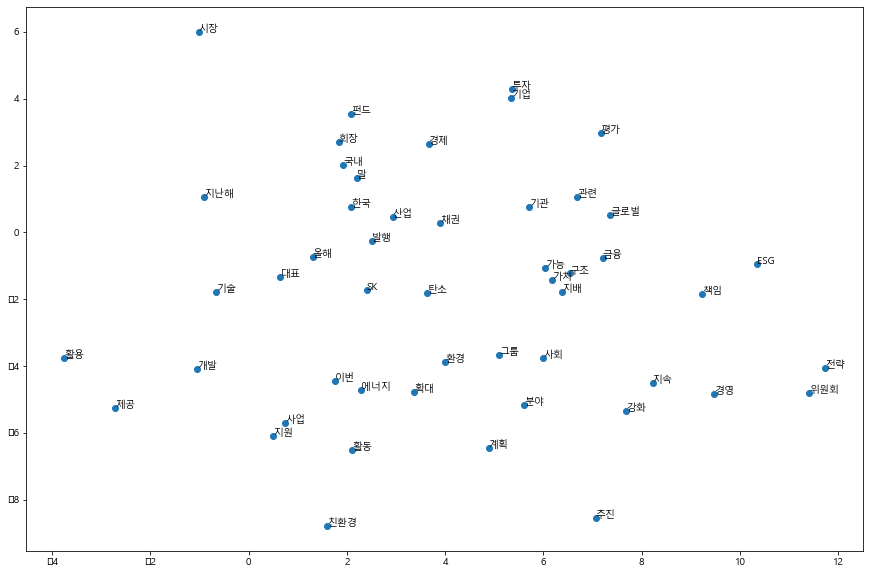

In [31]:
plot_2d_graph(pca_50)

C:\Users\Becky\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:214: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\Becky\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:183: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0, flags=flags)


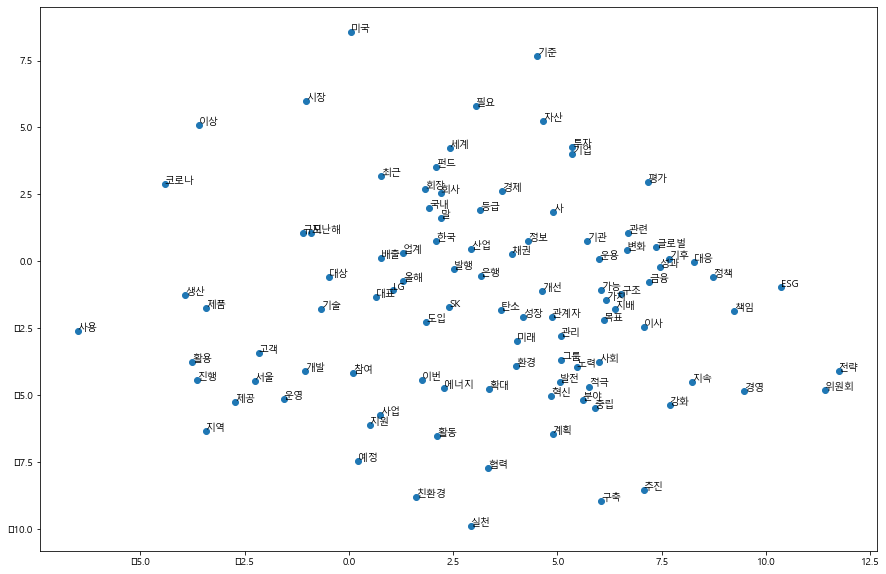

In [32]:
plot_2d_graph(pca_100)

C:\Users\Becky\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:214: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\Becky\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:183: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0, flags=flags)


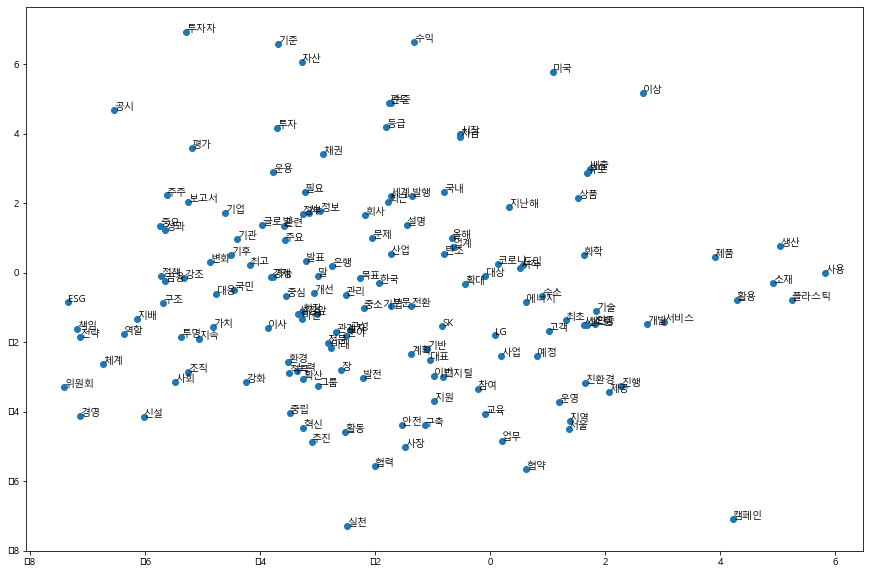

In [16]:
plot_2d_graph(pca_150)

C:\Users\VAIIM USER\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:203: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0, flags=flags)
C:\Users\VAIIM USER\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:203: RuntimeWarning: Glyph 903 missing from current font.
  font.set_text(s, 0, flags=flags)


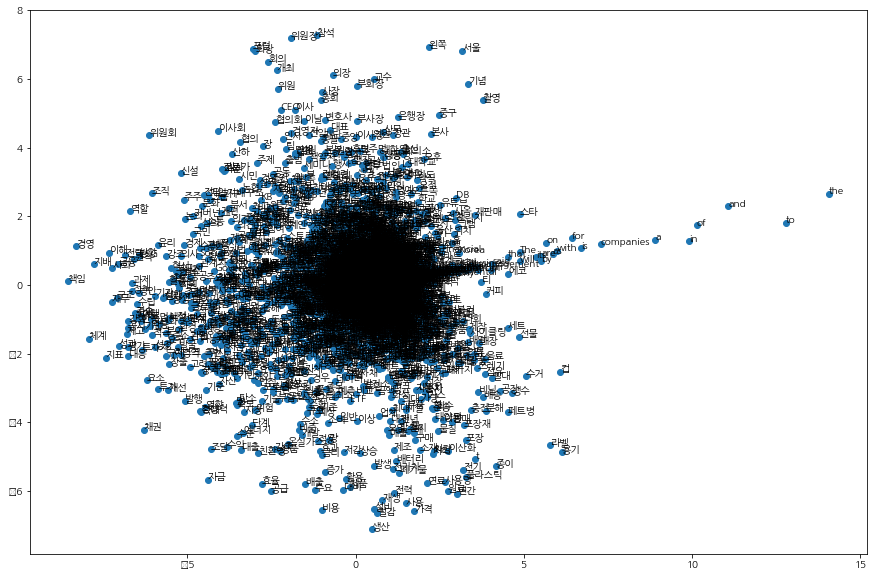

In [57]:
def plot_2d_graph(vocabs, xs, ys):
    plt.figure(figsize=(15,10))
    plt.scatter(xs,ys,marker='o')
    for i,v in enumerate(vocabs):
        plt.annotate(v,xy=(xs[i], ys[i]))
        
plot_2d_graph(vocabs, xs,ys)

In [45]:
print('SK :', model.wv.most_similar("SK", topn=80), '\n')

SK : [('이노베이션', 0.7888743281364441), ('하이닉스', 0.7586132884025574), ('텔레콤', 0.6618685126304626), ('스토리', 0.5931386947631836), ('최태원', 0.5882928967475891), ('브로드밴드', 0.5861219167709351), ('파이낸셜', 0.5829229950904846), ('관계사', 0.5177081823348999), ('ICT', 0.5036476850509644), ('플랜트', 0.470026433467865), ('코', 0.44060173630714417), ('양사', 0.4391573965549469), ('완성', 0.42291927337646484), ('웍스', 0.41609856486320496), ('SKT', 0.41584205627441406), ('구성원', 0.3960338830947876), ('C', 0.39505407214164734), ('통신', 0.39098986983299255), ('매각', 0.3838115334510803), ('비즈니스', 0.3729715347290039), ('가속', 0.3619901239871979), ('렌터카', 0.3590632677078247), ('사명', 0.3585771322250366), ('자회사', 0.3461701273918152), ('반도체', 0.34456580877304077), ('배터리', 0.3394290506839752), ('RE', 0.3349893093109131), ('apos', 0.32924118638038635), ('총수', 0.32877907156944275), ('쌍용', 0.3168698847293854), ('측정', 0.31554266810417175), ('재계', 0.3105669915676117), ('파워', 0.309467613697052), ('전력', 0.30284133553504944), ('그룹', 0.

In [36]:
print('ESG :', model.wv.most_similar("ESG", topn=80), '\n')
print('환경 :', model.wv.most_similar("환경", topn=20), '\n')
print('지배 :', model.wv.most_similar("지배", topn=20), '\n')
print('사회 :', model.wv.most_similar("사회", topn=20), '\n')

ESG : [('화두', 0.5686225891113281), ('책임', 0.5072119832038879), ('전반', 0.5054609179496765), ('반영', 0.4976956248283386), ('Governance', 0.48063725233078003), ('경영', 0.4800964593887329), ('재무', 0.46538734436035156), ('기업', 0.4607081711292267), ('SRI', 0.45638585090637207), ('국내외', 0.4478088617324829), ('차원', 0.4450360834598541), ('전략', 0.4397294521331787), ('요소', 0.4376504123210907), ('전담', 0.4331025183200836), ('지표', 0.43155941367149353), ('실질', 0.4211103916168213), ('Environment', 0.4187653958797455), ('필수', 0.41070663928985596), ('Social', 0.4043477773666382), ('주요', 0.40398699045181274), ('현황', 0.4010827839374542), ('내재', 0.39979106187820435), ('중요', 0.3970964848995209), ('요구', 0.3969501256942749), ('연기금', 0.3939844071865082), ('신설', 0.3938820958137512), ('원년', 0.39275360107421875), ('가이드라인', 0.3903477191925049), ('체계', 0.3883025646209717), ('모범', 0.38742297887802124), ('관련', 0.3797471821308136), ('고려', 0.37366920709609985), ('구체', 0.3723004162311554), ('실행', 0.3716586232185364), ('최근

In [ ]:
arti_esg = model.wv.most_similar("ESG", topn=80)


In [39]:
model.wv.similarity(w1 = 'CSR', w2 = 'ESG')

0.34298053

In [38]:
model.wv.distance(w1 = 'CSR', w2 = 'ESG')

0.6570194661617279

In [62]:
model.wv.similarity

NameError: name 'model' is not defined

In [17]:
word_vectors_list[0]

array([-0.21358128,  0.573906  ,  0.45120597,  1.095755  , -0.01776871,
       -0.30648693,  0.94023544,  0.22213256, -1.2155229 , -0.81915647,
       -0.2757164 ,  0.732277  ,  0.47805604,  0.86807793, -0.8367596 ,
        0.39091954,  1.0938808 ,  0.39373162, -1.2307372 , -1.3303802 ,
       -0.6608496 , -0.56995   ,  1.673834  , -0.222074  , -1.0683062 ,
       -0.41229582,  0.10144454, -1.1887721 , -0.63319194, -0.03452012,
       -0.68346125,  0.3244425 ,  0.61608183, -0.71524125, -0.42529508,
        0.24946722,  0.57390046, -1.1859729 ,  0.04804997, -1.2365146 ,
       -1.3474705 ,  0.11995353, -0.62387514, -0.02560182, -0.28570896,
        0.7647427 ,  0.19401182, -0.6592149 ,  0.4450102 ,  0.4283203 ,
        0.17481868,  1.2506112 ,  0.08860414,  0.27030185,  0.52192813,
       -0.93434334, -0.20699185, -0.1150556 , -0.34844035, -0.00915829,
        0.62540585, -0.61006343,  0.5896135 , -1.2956699 , -1.7672582 ,
        0.5362819 , -1.2170948 , -0.12471496, -1.1068774 ,  0.77

In [5]:
tokenized_data[0]

['산업',
 '금융',
 '법조',
 'ESG',
 '전문가',
 '대담',
 '제공',
 '이미지',
 'ESG',
 '환경',
 '사회',
 '가치',
 '지배',
 '구조',
 '논의',
 '원년',
 '평가',
 '포털',
 '사이트',
 '다음',
 'Daum',
 'ESG',
 '키워드',
 '검색',
 '건수',
 '기준',
 '간',
 '전체',
 'ESG',
 '건수',
 '배',
 'ESG',
 '주목',
 '지난해',
 '전',
 '세계',
 '코로나',
 'COVID',
 '전염병',
 '경제',
 '시스템',
 '전반',
 '충격',
 '정부',
 '기업',
 '그간',
 '재무',
 '리스크',
 '요인',
 '관리',
 '필요',
 '절감',
 '주요',
 '기업',
 '금융',
 '사',
 'ESG',
 '전사',
 '리스크',
 '관리',
 '전략',
 '기획',
 '차원',
 '시작',
 '올해',
 '축년',
 '기업',
 '금융',
 '법조',
 '다양',
 '분야',
 '활동',
 'ESG',
 '전문가',
 '초빙',
 'ESG',
 '규제',
 '환경',
 '변화',
 '기업',
 '금융',
 '길',
 '주제',
 '대담',
 '진행',
 '이번',
 '대담',
 '권기준',
 'SK',
 '수',
 '펙',
 '협의회',
 'SV',
 '위원회',
 '부사장',
 '김성우',
 '김',
 '애',
 '장법',
 '사무소',
 '환경',
 '에너지',
 '연구',
 '소장',
 '우상현',
 'KB',
 '은행',
 'CIB',
 '기업',
 '투자',
 '금융',
 '전무',
 'KB',
 '증권',
 'IB',
 '투자',
 '은행',
 '부사장',
 '윤석모',
 '삼성증권',
 '리서치',
 '센터',
 '장',
 'ESG',
 '연구',
 '소장',
 '참여',
 '이상',
 '순',
 '코로나',
 '확산',
 '시기',
 '감안',
 '이번',
 '대담',
 '박재범',
 '증권',
 '진행',
 '온라

In [6]:
tokenized_data_list = []

for i in tqdm(range(len(tokenized_data))):
    tokenized_data_list += tokenized_data[i] 

In [7]:
import collections
# apple3개, banana2개, cherry는 4개
list = ['apple', 'apple', 'apple', 'banana', 'banana',
'cherry', 'cherry', 'cherry', 'cherry']
# 빈도수를 세려면?
counts = collections.Counter(list)
print(counts)


Counter({'cherry': 4, 'apple': 3, 'banana': 2})


In [8]:
counts = collections.Counter(tokenized_data_list)

In [26]:
word_count = pd.DataFrame.from_dict(counts, orient='index').reset_index()
word_count.columns = ['word','count']
word_count = word_count.sort_values('count',ascending = False).reset_index(drop=True)

In [27]:
word_count

,word,count
0,ESG,27176
1,기업,14493
2,경영,13412
3,사회,10465
4,환경,8074
...,...,...
30276,인생관,1
30277,양창수,1
30278,TWA,1
30279,브라더,1


In [45]:
955110*0.8

764088.0

In [57]:
a = word_count.loc[:1700,'count']
a.sum()

769600

In [61]:
word_count.loc[1700,:]

word     수지
count    75
Name: 1700, dtype: object

In [46]:
word_count.loc[:955110*0.8,'count'].sum()

955110

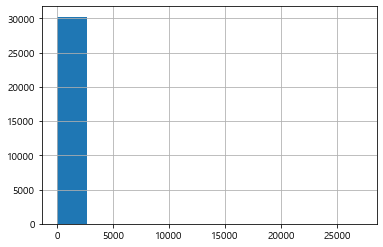

In [29]:
word_count['count'].hist()

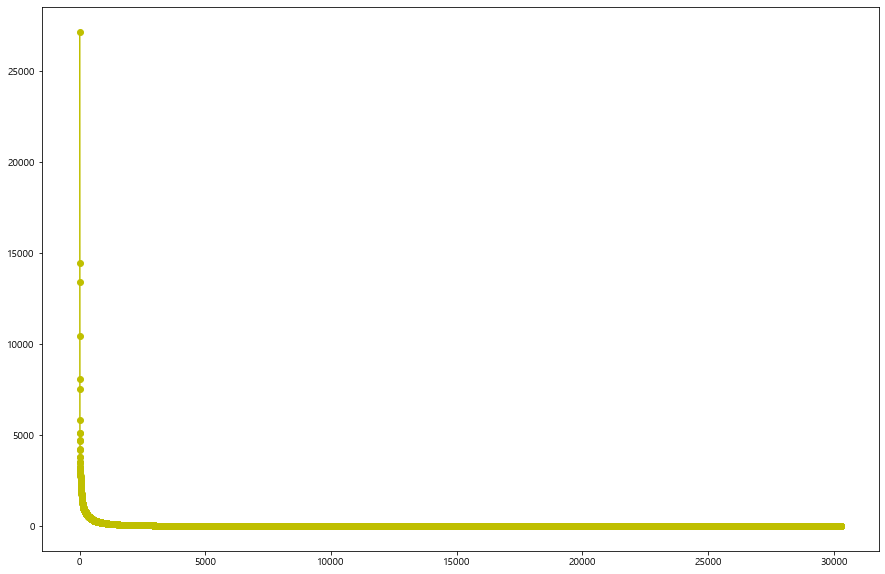

In [42]:
plt.figure(figsize=(15,10))
plt.plot(word_count['count'], marker='o', color='y')

In [19]:
from sklearn.feature_extraction.text import CountVectorizer

In [21]:
vect = CountVectorizer()
vect.fit(tokenized_data)
vect.vocabulary

AttributeError: 'list' object has no attribute 'lower'

In [20]:
vector = CountVectorizer()

# 코퍼스로부터 각 단어의 빈도수를 기록
print('bag of words vector :', vector.fit_transform().toarray()) 

# 각 단어의 인덱스가 어떻게 부여되었는지를 출력
print('vocabulary :',vector.vocabulary_)

NameError: name 'corpus' is not defined